# Simulación de filas de espera en una estación de servicio.



*   Llegadas 𝜆: 40 vehículos / hora.
*   Despachos μ : 1 vehículo / 8 minutos
*   Surtidores: M = 6

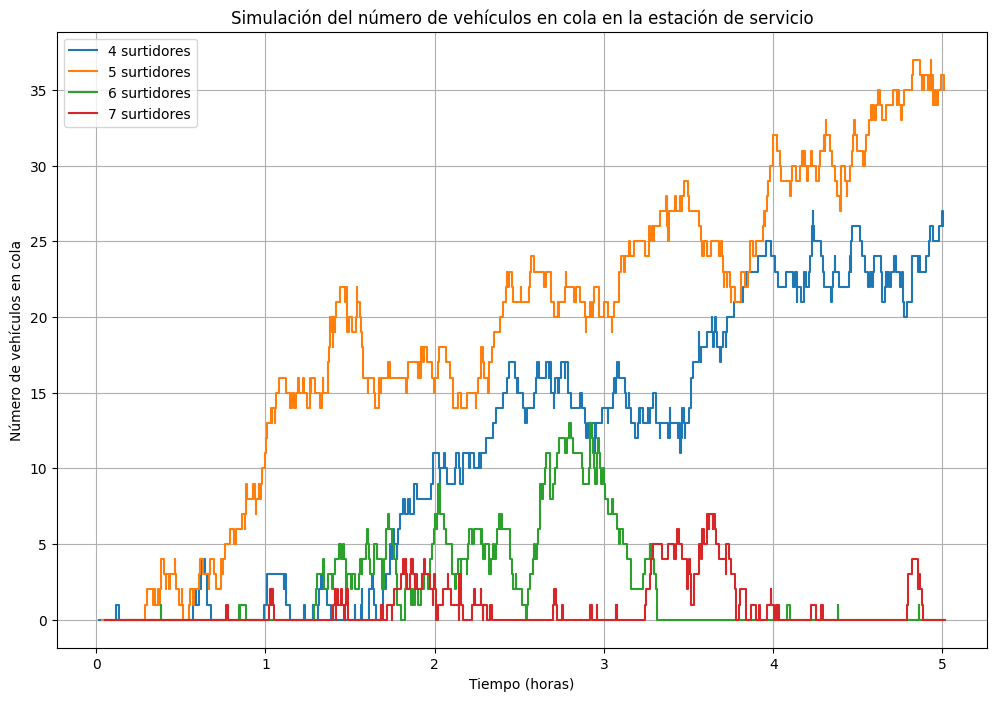

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simular_cola(s, tasa_llegada=40, tasa_servicio=7.5, tiempo_simulacion=5):
    tiempo_llegada = 1 / tasa_llegada  # Tiempo medio entre llegadas
    tiempo_servicio = 1 / tasa_servicio  # Tiempo medio de servicio por surtidor

    t = 0  # Tiempo actual
    cola = 0  # Número de vehículos en cola
    surtidores_ocupados = 0  # Número de surtidores ocupados
    lista_eventos = []  # Lista de eventos (tuplas de (tiempo, tipo))

    proxima_llegada = np.random.exponential(tiempo_llegada)
    lista_eventos.append((proxima_llegada, 'llegada'))

    tiempos = []
    longitudes_cola = []

    while t < tiempo_simulacion:
        lista_eventos.sort(key=lambda x: x[0])
        t, tipo_evento = lista_eventos.pop(0)

        tiempos.append(t)
        longitudes_cola.append(cola)

        if tipo_evento == 'llegada':
            if surtidores_ocupados < s:
                surtidores_ocupados += 1
                proxima_salida = t + np.random.exponential(tiempo_servicio)
                lista_eventos.append((proxima_salida, 'salida'))
            else:
                cola += 1
            proxima_llegada = t + np.random.exponential(tiempo_llegada)
            lista_eventos.append((proxima_llegada, 'llegada'))
        elif tipo_evento == 'salida':
            if cola > 0:
                cola -= 1
                proxima_salida = t + np.random.exponential(tiempo_servicio)
                lista_eventos.append((proxima_salida, 'salida'))
            else:
                surtidores_ocupados -= 1

    return tiempos, longitudes_cola

# Simular para diferentes números de surtidores
lista_surtidores = [4, 5, 6, 7]
plt.figure(figsize=(12, 8))

for s in lista_surtidores:
    tiempos, longitudes_cola = simular_cola(s)
    plt.plot(tiempos, longitudes_cola, label=f'{s} surtidores', drawstyle='steps-post')

plt.xlabel('Tiempo (horas)')
plt.ylabel('Número de vehículos en cola')
plt.title('Simulación del número de vehículos en cola en la estación de servicio')
plt.legend()
plt.grid(True)
plt.show()

# Costos de la fila de espera


*  Precio del litro de combustible = $1070
*  Costo por litro "50% del precio" = $535
*  Salario bruto de un empleado = $980,000 / mes
*  Capacidad prom. del tanque = 40 litros
*  Porcentaje de llenado del tanque = 70%
*  Cada empleado maneja 2 surtidores



<ipython-input-26-a9425a4d4f6f>:14: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  sumatoria = sum((lambda_rate / mu_rate) ** n / np.math.factorial(n) for n in range(s))
<ipython-input-26-a9425a4d4f6f>:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  sumatoria += (lambda_rate / mu_rate) ** s / (np.math.factorial(s) * (1 - rho))
<ipython-input-26-a9425a4d4f6f>:19: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  Lq = (P0 * (lambda_rate / mu_rate) ** s * rho) / (np.math.factorial(s) * (1 - rho) ** 2)


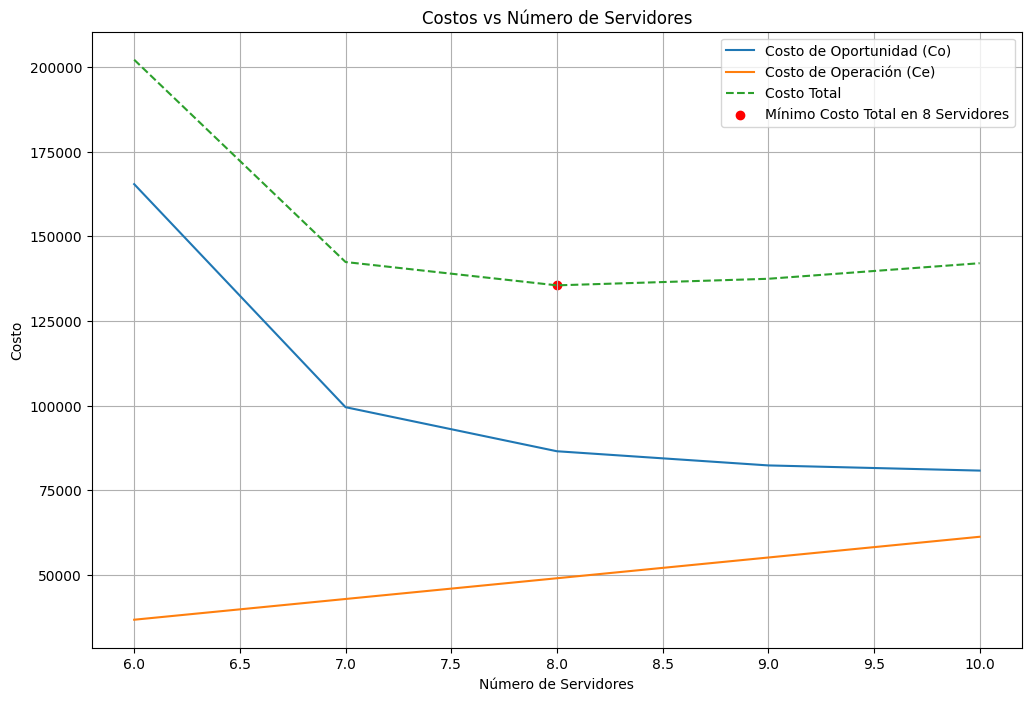

In [ ]:

# Parámetros
lambda_rate = 40
mu_rate = 7.5
costo_servidor = 6125
costo_no_despachar = 14980

def calcular_ws(s):
    rho = lambda_rate / (s * mu_rate)

    # Calcular P0 correctamente
    sumatoria = sum((lambda_rate / mu_rate) ** n / np.math.factorial(n) for n in range(s))
    sumatoria += (lambda_rate / mu_rate) ** s / (np.math.factorial(s) * (1 - rho))
    P0 = 1 / sumatoria

    # Calcular Lq correctamente
    Lq = (P0 * (lambda_rate / mu_rate) ** s * rho) / (np.math.factorial(s) * (1 - rho) ** 2)

    # Calcular Ws
    Ws = (1 / mu_rate) + (Lq / lambda_rate)
    return Ws

# Números de servidores a evaluar (empezando desde 6)
servidores = np.arange(6, 11)

# Listas para almacenar los resultados
costos_oportunidad = []
costos_operacion = []
costos_totales = []

# Calcular costos para cada número de servidores
for s in servidores:
    Ws = calcular_ws(s)
    Co = lambda_rate * Ws * costo_no_despachar  # Costo de oportunidad depende de Ws
    Ce = s * costo_servidor
    costos_oportunidad.append(Co)
    costos_operacion.append(Ce)
    costos_totales.append(Co + Ce)

# Encontrar el costo total mínimo y el número de servidores correspondiente
min_costo_total = min(costos_totales)
servidores_min = servidores[costos_totales.index(min_costo_total)]

# Graficar
plt.figure(figsize=(12, 8))
plt.plot(servidores, costos_oportunidad, label='Costo de Oportunidad (Co)')
plt.plot(servidores, costos_operacion, label='Costo de Operación (Ce)')
plt.plot(servidores, costos_totales, label='Costo Total', linestyle='--')

# Marcadores para el mínimo
plt.scatter([servidores_min], [min_costo_total], color='red', label=f'Mínimo Costo Total en {servidores_min} Servidores')

plt.xlabel('Número de Servidores')
plt.ylabel('Costo')
plt.title('Costos vs Número de Servidores')
plt.legend()
plt.grid(True)
plt.show()

